In [7]:
import requests

url = "http://103.82.92.37/DM20232/getdata.php"

response = requests.get(url)

In [8]:
datasets = response.json()
datasets[0]

{'nim': '15416226201001',
 'prodi': '26201',
 'predikat': 'Pujian',
 'tanggal_lulus': '2019-08-31',
 'tgl_masuk': '2015-09-06',
 'status_masuk': '0',
 'jenis_kelamin': '1',
 'tahun_lahir': '1994',
 'status_pegawai': '1'}

# Case 1

In [9]:
from datetime import datetime

datasets = response.json()
for data in datasets:
    nim = data['nim']
    tgl_masuk = datetime.strptime(data['tgl_masuk'], '%Y-%m-%d')
    tgl_lulus = datetime.strptime(data['tanggal_lulus'], '%Y-%m-%d')

    length_of_time = tgl_lulus - tgl_masuk

    years = length_of_time.days // 365
    months = (length_of_time.days % 365) // 30

    target_lulus = "(lulus tidak tepat waktu)" if years > 4 else ""

    print(f"NIM: {nim} - Lama kuliah: {years} tahun {months} bulan {target_lulus}")

NIM: 15416226201001 - Lama kuliah: 3 tahun 12 bulan 
NIM: 15416226201002 - Lama kuliah: 3 tahun 12 bulan 
NIM: 15416226201003 - Lama kuliah: 3 tahun 12 bulan 
NIM: 15416226201004 - Lama kuliah: 3 tahun 12 bulan 
NIM: 15416226201005 - Lama kuliah: 3 tahun 12 bulan 
NIM: 15416226201006 - Lama kuliah: 3 tahun 11 bulan 
NIM: 15416226201007 - Lama kuliah: 3 tahun 11 bulan 
NIM: 15416226201008 - Lama kuliah: 3 tahun 11 bulan 
NIM: 15416226201009 - Lama kuliah: 6 tahun 12 bulan (lulus tidak tepat waktu)
NIM: 15416226201010 - Lama kuliah: 3 tahun 12 bulan 
NIM: 15416226201013 - Lama kuliah: 3 tahun 12 bulan 
NIM: 15416226201014 - Lama kuliah: 3 tahun 11 bulan 
NIM: 15416226201015 - Lama kuliah: 3 tahun 12 bulan 
NIM: 15416226201016 - Lama kuliah: 5 tahun 4 bulan (lulus tidak tepat waktu)
NIM: 15416226201018 - Lama kuliah: 3 tahun 11 bulan 
NIM: 15416226201019 - Lama kuliah: 3 tahun 12 bulan 
NIM: 15416226201020 - Lama kuliah: 3 tahun 11 bulan 
NIM: 15416226201022 - Lama kuliah: 3 tahun 12 bula

# Case 2

In [25]:
import pandas as pd
from datetime import datetime


def calculate_days(day):
    years = day / 365
    months = (day % 370) // 30

    return f"{int(years)} tahun {int(months)} bulan"


datasets = response.json()

data_mahasiswa = []
for data in datasets:
    nim = data['nim']
    tgl_masuk = datetime.strptime(data['tgl_masuk'], '%Y-%m-%d')
    tgl_lulus = datetime.strptime(data['tanggal_lulus'], '%Y-%m-%d')

    length_of_time = tgl_lulus - tgl_masuk

    data_mahasiswa.append({
        'nim': nim,
        'lama_hari_kuliah': length_of_time.days
    })

df = pd.DataFrame(data_mahasiswa)

mean = df['lama_hari_kuliah'].mean()
median = df['lama_hari_kuliah'].median()
mode = df['lama_hari_kuliah'].mode()[0]

print(f"Rata-rata lama kuliah: {calculate_days(mean)}")
print(f"Median lama kuliah: {calculate_days(median)}")
print(f"Mode lama kuliah: {calculate_days(mode)}")


Rata-rata lama kuliah: 4 tahun 2 bulan
Median lama kuliah: 3 tahun 11 bulan
Mode lama kuliah: 3 tahun 11 bulan


# Case 3

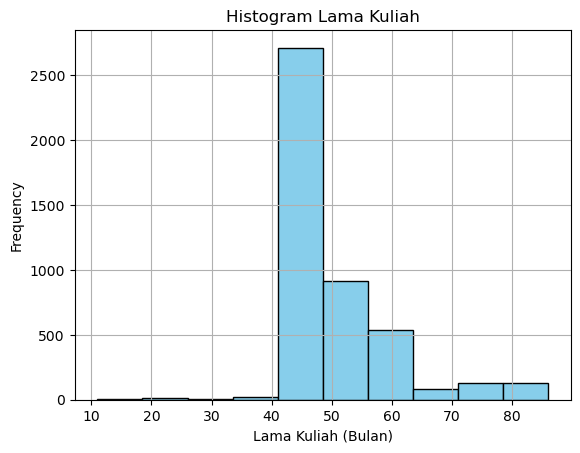

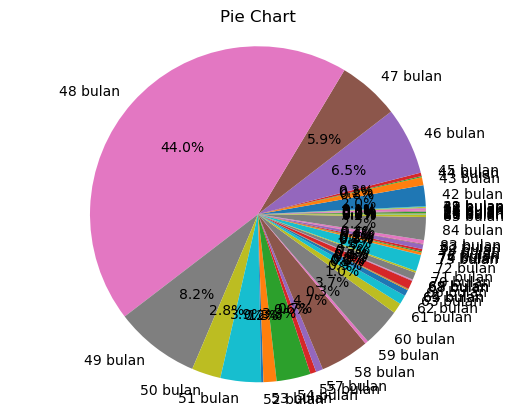

In [142]:
import matplotlib.pyplot as plt
import pandas as pd
from datetime import datetime
import pandas as pd

def calculate_month(day):
    months = day // 30
    return months


datasets = response.json()

data_mahasiswa = []
for data in datasets:
    nim = data['nim']
    tgl_masuk = datetime.strptime(data['tgl_masuk'], '%Y-%m-%d')
    tgl_lulus = datetime.strptime(data['tanggal_lulus'], '%Y-%m-%d')

    length_of_time = tgl_lulus - tgl_masuk

    data_mahasiswa.append({
        'nim': nim,
        'lama_bulan_kuliah': calculate_month(length_of_time.days)
    })

df = pd.DataFrame(data_mahasiswa)
grouped_data = df.groupby('lama_bulan_kuliah').size().reset_index(name='count')

plt.hist(df['lama_bulan_kuliah'], color='skyblue', edgecolor='black')
plt.grid(True)
plt.xlabel('Lama Kuliah (Bulan)')
plt.ylabel('Frequency')
plt.title('Histogram Lama Kuliah')
plt.show()

grouped_data['lama_bulan_kuliah'] = grouped_data['lama_bulan_kuliah'].apply(lambda x: str(x) + " bulan")
sizes = grouped_data['count']
labels = grouped_data['lama_bulan_kuliah']
plt.pie(sizes, labels=labels, autopct='%1.1f%%')
plt.title('Pie Chart')
plt.axis('equal')
plt.show()